In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Prepairing the data

The data is processed to be used 
        RainToday and RainTomorrow are comverted to int from binary 

While unsable data has been dropped
        (WindGustDir, WindDir9am, WindDir3pm, Location)

In [14]:
df = pd.read_csv("updated_weatherAUS.csv")

df = df.drop("Date", axis=1)
df["RainToday"] = (df["RainToday"] == "Yes").astype("int16")
df["RainTomorrow"] = (df["RainTomorrow"] == "Yes").astype("int16")
df = df.drop("WindGustDir", axis=1)
df = df.drop("WindDir9am", axis=1)
df = df.drop("WindDir3pm", axis=1)

df = df.drop("Location", axis=1)

df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


# Feature Scaling

In [18]:

scaler = StandardScaler()
data_standardized = scaler.fit_transform(df.values)

pd.DataFrame(data_standardized, columns=df.columns).head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.205232,-0.016205,-0.203581,-0.746516,-0.845389,0.407796,0.681283,0.628382,0.160852,-1.251090,0.307741,0.312970,1.679577,-0.875693,0.017246,0.085732,-0.529795,-0.529764
1,-0.720312,0.280780,-0.275097,-0.746516,-0.845389,0.407796,-1.097764,0.409059,-1.125609,-1.116768,0.317092,0.315235,-0.874270,-0.875693,0.061940,0.413155,-0.529795,-0.529764
2,0.128104,0.361776,-0.275097,-0.746516,-0.845389,0.527921,0.570092,0.847705,-1.411490,-0.892897,0.307419,0.318147,-0.874270,-0.219635,0.628056,0.269089,-0.529795,-0.529764
3,-0.442649,0.672260,-0.275097,-0.746516,-0.845389,-0.793463,-0.319431,-1.016540,-1.077963,-1.519736,0.339661,0.331412,-0.874270,-0.875693,0.196020,0.701288,-0.529795,-0.529764
4,0.837688,1.252731,-0.155903,-0.746516,-0.845389,0.227607,-0.764193,0.189736,0.684967,-0.758574,0.317736,0.309411,1.360346,1.748540,0.151327,1.120390,-0.529795,-0.529764


# Main function

In [5]:
k=4
kmeans = KMeans(n_clusters=k, random_state=40)

In [ ]:
kmeans.fit(data_standardized)

In [7]:
df['Cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_

# PCA plot

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
cols = df.columns
X = df[cols[:18]].values
transformed_x = pca.fit_transform(data_standardized)

transformed_x= pd.DataFrame(np.column_stack((transformed_x, kmeans.labels_)))

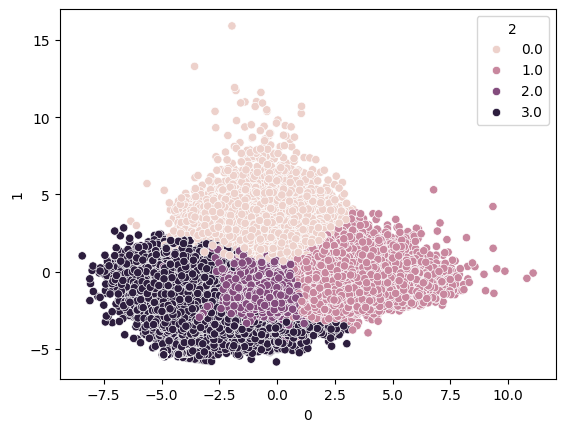

In [11]:
sns.scatterplot(x=0, y=1, data=transformed_x, hue=2)
plt.show()